In [174]:
import csv, pandas as pd, matplotlib.pyplot as plt, numpy as np

In [5]:
# Download PPI data
!wget -N -P data/ https://reactome.org/download/current/interactors/reactome.homo_sapiens.interactions.tab-delimited.txt

--2022-10-14 15:58:20--  https://reactome.org/download/current/interactors/reactome.homo_sapiens.interactions.tab-delimited.txt
Resolving reactome.org (reactome.org)... 100.25.71.177
Connecting to reactome.org (reactome.org)|100.25.71.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42957404 (41M) [text/plain]
Saving to: ‘data/reactome.homo_sapiens.interactions.tab-delimited.txt’

reactome.homo_sapie 100%[===================>]  40.97M  17.5MB/s    in 2.3s    

2022-10-14 15:58:23 (17.5 MB/s) - ‘data/reactome.homo_sapiens.interactions.tab-delimited.txt’ saved [42957404/42957404]



In [147]:
'''Read in Protein-Protein Interaction (PPI) table data'''
ppi_table = pd.read_table('data/reactome.homo_sapiens.interactions.tab-delimited.txt')
protein2protein = dict()
ppi2pubmed = dict()
pubmed2ppi = dict()

with open('data/reactome_ppi.csv','w') as fout:
    writer = csv.writer(fout)
    writer.writerow(['Protein 1','Protein 2','Reaction Context','Interaction Type','PubMed References'])
    
    for i in range(0, len(ppi_table)):
        # Get PPI
        protein_1 = ppi_table['# Interactor 1 uniprot id'].iloc[i]
        protein_2 = ppi_table['Interactor 2 uniprot id'].iloc[i]
        if 'uniprotkb' in protein_1 and 'uniprotkb' in protein_2:
            protein_1 = protein_1.split(':')[1]
            protein_2 = protein_2.split(':')[1]
            protein2protein.setdefault(protein_1, set()).add(protein_2)
            protein2protein.setdefault(protein_2, set()).add(protein_1)
            reaction = ppi_table['Interaction context'].iloc[i]
            interaction_type = ppi_table['Interaction type'].iloc[i]
            pubmed_refs = ppi_table['Pubmed references'].iloc[i]
            writer.writerow([protein_1, protein_2, reaction, interaction_type, pubmed_refs])

            # Get PPI-PMIDs
            if type(pubmed_refs) == str:
                pubmed_refs = pubmed_refs.split('|')
                for pubmed_ref in pubmed_refs:
                    ppi2pubmed.setdefault(str(protein_1+protein_2), set()).add(pubmed_ref)  
                    pubmed2ppi.setdefault(pubmed_ref, set()).add(str(protein_1+protein_2))
            else:
                 ppi2pubmed.setdefault(str(protein_1+protein_2), set())      
                    
    
                    
ppi_df = pd.read_csv(open('data/reactome_ppi.csv'))

alleged_proteins = set(ppi_table['# Interactor 1 uniprot id']).union(ppi_table['Interactor 2 uniprot id'])
reaction2count = dict(ppi_df.value_counts('Reaction Context'))

# Get count of PPI-PubMed
ppi2num_pubmed = dict()
for ppi, pubmeds in ppi2pubmed.items():
    count = len(pubmeds)
    ppi2num_pubmed[ppi] = ppi2num_pubmed.get(ppi, 0) + count
ppi2num_pubmed = dict(sorted(ppi2num_pubmed.items(), key = lambda x:x[1], reverse=True))

In [148]:
'''Reactome Reaction ID -> Name'''
# Data taken from the Reactome Neo4j Graph data https://reactome.org/download-data/
reaction_df = pd.read_csv('../../Drug Repurposing Knowledge Graph/input/human_reaction-like_events.csv')[['stId','displayName','category']].drop_duplicates()

reaction_id2name = dict()

for i in range(0,len(reaction_df)):
    reaction_id = reaction_df['stId'].iloc[i]
    name = reaction_df['displayName'].iloc[i]
    category = reaction_df['category'].iloc[i]
    
    if type(name) != str:
        continue
    name += ' '+category
    
    reaction_id2name.setdefault(reaction_id, list()).append(name)
    
    
reaction_name2count = dict()
for reaction_id, count in reaction2count.items():
    reaction_id = reaction_id.split(':')[1]
    try:
        reaction_name = list(reaction_id2name[reaction_id])[0]
        reaction_name2count[reaction_name] = count
    except:
        pass

In [149]:
'''Protein Info'''
print(len(alleged_proteins), 'entities in the PPI')
print(len(protein2protein), 'proteins in the PPI')
print(len(ppi_df), 'proteins in the PPI')

8787 entities in the PPI
5616 proteins in the PPI
69677 proteins in the PPI


In [175]:
protein2num_partners = dict()

for protein, protein_partners in protein2protein.items():
    protein2num_partners[protein] = len(protein_partners)
protein2num_partners.values()

{'Q9Y287': 1,
 'P37840': 6,
 'P0DJI8': 1,
 'P06727': 1,
 'P01160': 3,
 'P51572': 3,
 'O95999': 18,
 'P05067': 22,
 'P61769': 77,
 'Q13085': 2,
 'O00763': 2,
 'P31415': 1,
 'O14958': 1,
 'P47710': 1,
 'P07498': 1,
 'P01258': 2,
 'P15502': 14,
 'P35555': 23,
 'P35556': 16,
 'Q75N90': 1,
 'P02751': 24,
 'P02452': 6,
 'P08123': 6,
 'O76075': 6,
 'Q15768': 30,
 'P98172': 30,
 'P52799': 30,
 'Q9Y6C2': 9,
 'Q9BXX0': 1,
 'Q9NT22': 1,
 'P63261': 45,
 'P60709': 48,
 'P01834': 60,
 'P12319': 12,
 'P01854': 12,
 'Q01362': 12,
 'P30273': 20,
 'Q7Z3Y9': 5,
 'Q7Z3Z0': 5,
 'P20930': 14,
 'Q7Z3Y7': 5,
 'Q7Z3Y8': 5,
 'P34059': 1,
 'P06396': 2,
 'P01242': 24,
 'P01241': 24,
 'Q68CP4': 1,
 'P04792': 7,
 'P11142': 37,
 'P07900': 87,
 'P08238': 44,
 'P13473': 17,
 'P10997': 5,
 'Q9Y4K3': 89,
 'Q14954': 4,
 'P13647': 9,
 'P02533': 9,
 'Q15582': 1,
 'Q13099': 29,
 'Q9UBN7': 27,
 'P13569': 32,
 'O60664': 18,
 'O95613': 29,
 'Q99497': 31,
 'P68871': 25,
 'Q3SXY8': 31,
 'Q12798': 29,
 'P08670': 28,
 'P07998': 17

1 min protein partners per protein
175 max protein partners per protein
7.625534188034188 average protein partners per protein
3.0 median protein partners per protein


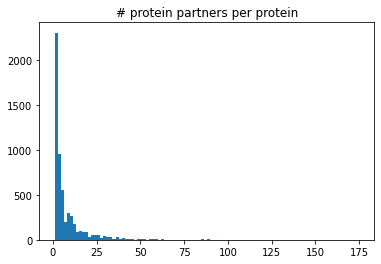

In [177]:
plt.title('# protein partners per protein');
plt.hist(list(protein2num_partners.values()), bins=100);
print(min(list(protein2num_partners.values())), 'min protein partners per protein')
print(max(list(protein2num_partners.values())), 'max protein partners per protein')
print(np.mean(list(protein2num_partners.values())), 'average protein partners per protein')
print(np.median(list(protein2num_partners.values())),'median protein partners per protein')

{'physical association': 62990,
 'enzymatic reaction': 4675,
 'cleavage reaction': 1195,
 'dephosphorylation reaction': 405,
 'oxidoreductase activity electron transfer reaction': 100,
 'acetylation reaction': 80,
 'glycosylation reaction': 43,
 'gtpase reaction': 41,
 'nucleoside triphosphatase reaction': 37,
 'phospholipase reaction': 34,
 'deubiquitination reaction': 15,
 'carboxylation reaction': 15,
 'demethylation reaction': 13,
 'deacetylation reaction': 13,
 'amidation reaction': 9,
 'deneddylation reaction': 6,
 'sulfurtransfer reaction': 3,
 'isomerase reaction': 1,
 'de-ADP-ribosylation reaction': 1,
 'phosphopantetheinylation': 1}

1 min PPIs per Interaction Type
62990 max PPIs per Interaction Type
3483.85 average PPIs per Interaction Type
24.5 median PPIs per Interaction Type


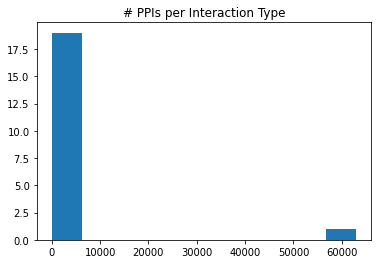

In [173]:
# PPI interaction types
interaction_types2count = dict(ppi_df.value_counts('Interaction Type'))
display(interaction_types2count)
plt.title('# PPIs per Interaction Type');
plt.hist(list(interaction_types2count.values()));
print(min(list(interaction_types2count.values())), 'min PPIs per Interaction Type')
print(max(list(interaction_types2count.values())), 'max PPIs per Interaction Type')
print(np.mean(list(interaction_types2count.values())), 'average PPIs per Interaction Type')
print(np.median(list(interaction_types2count.values())),'median PPIs per Interaction Type')

{'Phosphorylation of ZAP-70 by Lck transition': 306,
 'Conversion of C4 into C4a and C4b transition': 147,
 'p-AMPK:AMP phosphorylates Raptor in the MTORC1 complex transition': 91,
 'Phosphorylation of PLC-gamma1 transition': 88,
 'EXO1 or DNA2 in complex with BLM or WRN binds initially resected DNA DSBs along with BRIP1 recruitment binding': 87,
 'RAB6:GTP displaces PAFAH1B1 from dynein:dynactin complex transition': 80,
 'ULK1 phosphorylates AMBRA1:BECN1 complex transition': 77,
 'RAS guanyl-nucleotide exchange mediated by SOS1 in complex with GRB2 and p-SHC1:Phosphorylated ERBB2 heterodimers transition': 76,
 'CDT1-mediated formation of MCM2-7 double hexamer at the replication origin transition': 76,
 'MAP2Ks and MAPKs bind to the activated mutant RAF1 complex binding': 72,
 'AMPK phosphorylates Raptor in the mTORC1 complex transition': 63,
 'ERBB2 forms heterodimers with ligand-activated ERBB receptors: EGFR, ERBB3 and ERBB4 dissociation': 62,
 'Gab2 binds the p85 subunit of Class 1

1 min PPIs per reaction
306 max PPIs per reaction
5.840272520817562 average PPIs per reaction
3.0 median PPIs per reaction


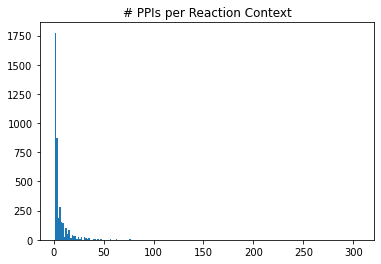

In [171]:
# PPI Reaction Contexts
display(reaction_name2count)

plt.title('# PPIs per Reaction Context');
plt.hist(list(reaction_name2count.values()), bins = 200);
print(min(list(reaction_name2count.values())), 'min PPIs per reaction')
print(max(list(reaction_name2count.values())), 'max PPIs per reaction')
print(np.mean(list(reaction_name2count.values())), 'average PPIs per reaction')
print(np.median(list(reaction_name2count.values())),'median PPIs per reaction')

10851 PubMed articles used as sources
26224 PPIs with PubMed articles used as sources
43453 PPIs without PubMed articles as sources


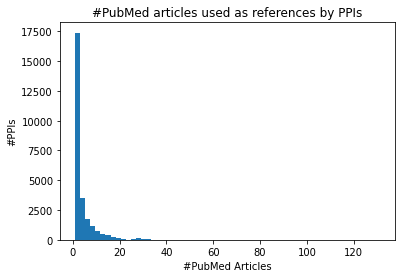

In [161]:
'''PubMed References per PPI'''
print(len(pubmed2ppi), 'PubMed articles used as sources')
print(len(ppi2pubmed), 'PPIs with PubMed articles used as sources')
print(len(ppi_df) - len(ppi2pubmed), 'PPIs without PubMed articles as sources')
plt.title('#PubMed articles used as references by PPIs')
plt.xlabel('#PubMed Articles')
plt.ylabel('#PPIs')
plt.hist(ppi2num_pubmed.values(),bins=60);